In [1]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification

numpy实现Fisher

In [2]:
x, y = make_multilabel_classification(n_samples=200, n_features=2,n_labels=1, n_classes=1,random_state=2)  
index1 = np.array([index for (index, value) in enumerate(y) if value == 0])  
index2 = np.array([index for (index, value) in enumerate(y) if value == 1]) 
c_1 = x[index1]  
c_2 = x[index2] 

#计算协方差和均值向量
def cov_and_avg(samples):
    u1 = np.mean(samples, axis=0)
    cov_m = np.zeros((samples.shape[1], samples.shape[1]))
    for s in samples:
        t = s - u1
        cov_m += t * t.reshape(2, 1)
    return cov_m, u1


def fisher(c_1, c_2):
    cov_1, u1 = cov_and_avg(c_1)
    cov_2, u2 = cov_and_avg(c_2)
    s_w = cov_1 + cov_2
    u, s, v = np.linalg.svd(s_w)  
    s_w_inv = np.dot(np.dot(v.T, np.linalg.inv(np.diag(s))), u.T)
    return np.dot(s_w_inv, u1 - u2)


def judge(sample, w, c_1, c_2):
    u1 = np.mean(c_1, axis=0)
    u2 = np.mean(c_2, axis=0)
    center_1 = np.dot(w.T, u1)
    center_2 = np.dot(w.T, u2)
    pos = np.dot(w.T, sample)
    return abs(pos - center_1) < abs(pos - center_2)

# 调用函数，得到参数w
w = fisher(c_1, c_2)  
# 判断所属的类别
out = judge(c_1[1], w, c_1, c_2)   
print(out)

True


Plot图像

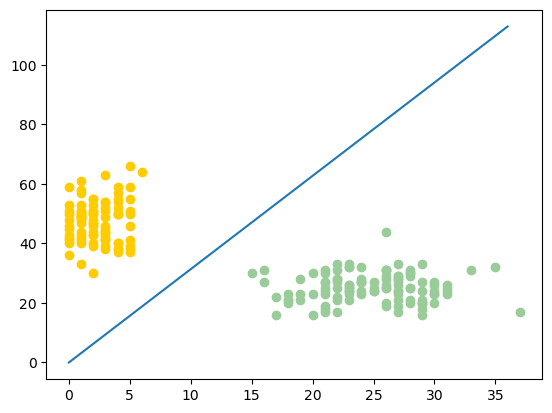

In [3]:
plt.scatter(c_1[:, 0], c_1[:, 1], c='#99CC99')
plt.scatter(c_2[:, 0], c_2[:, 1], c='#FFCC00')
line_x = np.arange(min(np.min(c_1[:, 0]), np.min(c_2[:, 0])),
                    max(np.max(c_1[:, 0]), np.max(c_2[:, 0])),
                    step=1)

line_y = - (w[0] * line_x) / w[1]
plt.plot(line_x, line_y)
plt.show()

使用sklraen的结果

In [4]:
fisher_clf = LinearDiscriminantAnalysis()
fisher_clf.fit(x,y)
y_pred=fisher_clf.predict(x)
print(y_pred)

[1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1]


f:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


小结
1.通过构建函数实现Fihser判别
2.计算各类样本的协方差均值向量
3.计算样本类内离散度矩阵和总类内离散度矩阵
4.计算样本类间离散度矩阵
5.求投影方向向量
6.定义Fisher准则函数
7.对给定的测试样本根据决策规则分类
